# Cluster Based Analysis for Patients with out BB

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

% matplotlib inline

In [2]:
import pandas as pd
data = pd.read_csv("/Users/joudsi/Desktop/subdata_not_bb_norm_clustered.csv")

In [3]:
data.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
0,0,0.488717,0.0,0.682906,0.952925,0.495046,0.041051,0.403509,0.488372,0.394879,0.092476,0.040731,0.428571,0.358974,0,0
1,1,0.857449,0.0,0.526844,0.981238,0.316202,0.012315,0.280702,0.476744,0.199340,0.137735,0.077489,0.329670,0.183761,2,1
2,2,0.593153,0.0,0.585988,0.989232,0.462089,0.190887,0.385965,0.174419,0.481896,0.094828,0.020862,0.428571,0.512821,0,1
3,3,0.599880,0.0,0.344937,0.996756,0.188622,0.025999,0.397661,0.418605,0.430886,0.200627,0.064574,0.576923,0.504274,2,0
4,4,1.000000,0.0,0.557659,0.936510,0.400152,0.073892,0.429825,0.430233,0.482897,0.150666,0.100338,0.318681,0.528846,2,1


In [4]:
print("# of observations: ", str(len(data.index)))

('# of observations: ', '6470')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6470 entries, 0 to 6469
Data columns (total 16 columns):
Unnamed: 0          6470 non-null int64
amdission_age       6470 non-null float64
gender              6470 non-null float64
tempc_mean          6470 non-null float64
spo2_mean           6470 non-null float64
resprate_mean       6470 non-null float64
creatinine_mean     6470 non-null float64
potassium_mean      6470 non-null float64
bicarbonate_mean    6470 non-null float64
hematocrit_mean     6470 non-null float64
glucose_mean        6470 non-null float64
lactate_mean        6470 non-null float64
albumin_mean        6470 non-null float64
hemoglobin_mean     6470 non-null float64
clust               6470 non-null int64
is_AKI              6470 non-null int64
dtypes: float64(13), int64(3)
memory usage: 808.8 KB


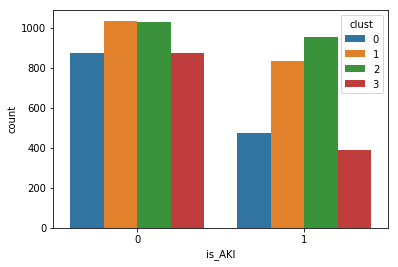

In [6]:
sns.countplot(x="is_AKI", hue="clust",data=data)

## LR Analysis C0

In [7]:
data.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
0,0,0.488717,0.0,0.682906,0.952925,0.495046,0.041051,0.403509,0.488372,0.394879,0.092476,0.040731,0.428571,0.358974,0,0
1,1,0.857449,0.0,0.526844,0.981238,0.316202,0.012315,0.280702,0.476744,0.199340,0.137735,0.077489,0.329670,0.183761,2,1
2,2,0.593153,0.0,0.585988,0.989232,0.462089,0.190887,0.385965,0.174419,0.481896,0.094828,0.020862,0.428571,0.512821,0,1
3,3,0.599880,0.0,0.344937,0.996756,0.188622,0.025999,0.397661,0.418605,0.430886,0.200627,0.064574,0.576923,0.504274,2,0
4,4,1.000000,0.0,0.557659,0.936510,0.400152,0.073892,0.429825,0.430233,0.482897,0.150666,0.100338,0.318681,0.528846,2,1


In [8]:
data0 = data[data['clust']==0]

In [9]:
t = data0.drop("is_AKI", axis=1)
X0 = t.drop('clust', axis = 1)
Y0 = data0["is_AKI"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X0,Y0, test_size=0.3, random_state=1)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logmodel = LogisticRegression()

In [14]:
logmodel.fit(X_train, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
predictions = logmodel.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

In [17]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.65      1.00      0.78       262\n           1       0.50      0.01      0.01       143\n\n   micro avg       0.65      0.65      0.65       405\n   macro avg       0.57      0.50      0.40       405\nweighted avg       0.60      0.65      0.51       405\n'

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test, predictions)

array([[261,   1],
       [142,   1]])

### Calculate Accuracy

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test, predictions)

0.6469135802469136

## LR Analysis C1

In [22]:
data1 = data[data['clust']==1]

In [23]:
data1.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
8,8,0.779984,1.0,0.588473,0.976018,0.452545,0.032841,0.342105,0.406977,0.432887,0.140674,0.060600,0.384615,0.427885,1,0
15,15,0.903341,1.0,0.492053,0.975439,0.385737,0.090312,0.385965,0.386047,0.518618,0.217085,0.074328,0.285714,0.490842,1,1
22,22,0.805191,1.0,0.867795,0.884615,0.341681,0.032841,0.149123,0.267442,0.305861,0.176528,0.217564,0.252747,0.317308,1,0
23,23,0.811149,1.0,0.648115,0.952962,0.459277,0.137521,0.491228,0.546512,0.362873,0.210619,0.018875,0.483516,0.365385,1,1
24,24,0.894989,1.0,0.587479,0.953259,0.494300,0.045156,0.447368,0.488372,0.381876,0.135972,0.068548,0.373626,0.391026,1,0


In [24]:
t = data1.drop("is_AKI", axis=1)
X1 = t.drop('clust', axis = 1)
Y1 = data1["is_AKI"]

In [25]:
X1.shape

(1870, 14)

In [26]:
Y1.shape

(1870,)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.3, random_state=1)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()

In [31]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.58      0.73      0.65       313\n           1       0.50      0.34      0.41       248\n\n   micro avg       0.56      0.56      0.56       561\n   macro avg       0.54      0.54      0.53       561\nweighted avg       0.55      0.56      0.54       561\n'

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, predictions)

array([[229,  84],
       [163,  85]])

### Calculate Accuracy

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, predictions)

0.5597147950089126

## LR Analysis C2

In [39]:
data2 = data[data['clust']==2]

In [40]:
data2.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
1,1,0.857449,0.0,0.526844,0.981238,0.316202,0.012315,0.280702,0.476744,0.199340,0.137735,0.077489,0.329670,0.183761,2,1
3,3,0.599880,0.0,0.344937,0.996756,0.188622,0.025999,0.397661,0.418605,0.430886,0.200627,0.064574,0.576923,0.504274,2,0
4,4,1.000000,0.0,0.557659,0.936510,0.400152,0.073892,0.429825,0.430233,0.482897,0.150666,0.100338,0.318681,0.528846,2,1
5,5,0.799402,0.0,0.668327,0.982380,0.243293,0.065681,0.327485,0.441860,0.544242,0.143417,0.044705,0.604396,0.598291,2,0
10,10,0.755258,0.0,0.544239,0.989547,0.333034,0.313629,0.563596,0.298450,0.437221,0.120018,0.042718,0.560440,0.460470,2,1


In [41]:
t = data2.drop("is_AKI", axis=1)
X2 = t.drop('clust', axis = 1)
Y2 = data2["is_AKI"]

In [42]:
X2.shape

(1986, 14)

In [43]:
Y2.shape

(1986,)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X2,Y2, test_size=0.3, random_state=1)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel = LogisticRegression()

In [48]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
predictions = logmodel.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.58      0.73      0.64       296\n           1       0.64      0.48      0.55       300\n\n   micro avg       0.60      0.60      0.60       596\n   macro avg       0.61      0.60      0.60       596\nweighted avg       0.61      0.60      0.60       596\n'

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test, predictions)

array([[215,  81],
       [156, 144]])

### Calculate Accuracy

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test, predictions)

0.6023489932885906

## LR Analysis C3

In [56]:
data3 = data[data['clust']==3]

In [57]:
data3.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
6,6,0.588504,1.0,0.679924,0.979987,0.256728,0.020525,0.295322,0.403101,0.462492,0.110110,0.083118,0.571429,0.482051,3,0
11,11,0.457483,1.0,0.653947,0.987222,0.325610,0.024631,0.308772,0.623256,0.139828,0.096708,0.033777,0.373626,0.092949,3,1
18,18,0.538123,1.0,0.492053,0.798982,0.598297,0.038314,0.631579,0.131783,0.132026,0.053292,0.533479,0.208791,0.130769,3,0
25,25,0.424070,1.0,0.537281,0.998874,0.384146,0.082923,0.466165,0.172093,0.402881,0.819671,0.117557,0.428571,0.391026,3,1
32,32,0.581976,1.0,0.666007,0.924353,0.316337,0.045156,0.359649,0.511628,0.467894,0.116771,0.016889,0.521978,0.490385,3,0


In [58]:
t = data3.drop("is_AKI", axis=1)
X3 = t.drop('clust', axis = 1)
Y3 = data3["is_AKI"]

In [59]:
X3.shape

(1265, 14)

In [60]:
Y3.shape

(1265,)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X3,Y3, test_size=0.3, random_state=1)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logmodel = LogisticRegression()

In [65]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
predictions = logmodel.predict(X_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
classification_report(y_test, predictions)

/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


u'              precision    recall  f1-score   support\n\n           0       0.72      1.00      0.83       272\n           1       0.00      0.00      0.00       108\n\n   micro avg       0.72      0.72      0.72       380\n   macro avg       0.36      0.50      0.42       380\nweighted avg       0.51      0.72      0.60       380\n'

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_test, predictions)

array([[272,   0],
       [108,   0]])

### Calculate Accuracy

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test, predictions)

0.7157894736842105